Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

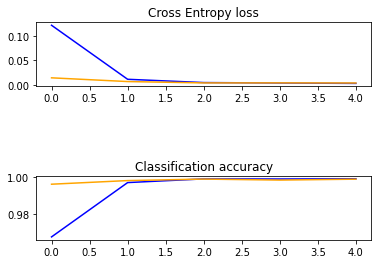

Accuracy: mean=99.360 std=0.000, n=1


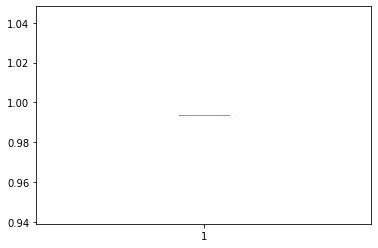

In [ ]:
#Importing required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pandas as pd
from tensorflow import keras
import pydot

#Loading the dataset
def load_and_prep_dataset():
  #load dataset
  path="/content/drive/MyDrive/Kannada Mnist/Dataset/full_and_final/Akashdeep.npz"
  with np.load(path) as data:
    train_X = data['x_train']
    train_Y = data['y_train']
    test_X = data['x_test']
    test_Y = data['y_test']
  (x_train, y_train),(x_test,y_test)=(train_X,train_Y),(test_X,test_Y)

  #converting from array to list
  y_train = y_train.tolist()
  x_train = x_train.tolist()

  #shuffling dataset
  for _ in range(random.randint(5,20)):
    temp = list(zip(x_train, y_train))
    random.shuffle(temp)
    x_train, y_train = zip(*temp)
 
 # list to array
  x_train = np.array(x_train)
  y_train = np.array(y_train)

  #for testing dataset
  y_test = y_test.tolist()
  x_test = x_test.tolist()  
 
  for _ in range(random.randint(5,20)):
    temp = list(zip(x_test, y_test))
    random.shuffle(temp)
    x_test, y_test = zip(*temp)
 
  y_test = np.array(y_test)
  x_test = np.array(x_test)

  #Normailizing the dataset
  #pixels will have 0 to 255 values
  #make it fall in the range [0,1]
  x_train = tf.keras.utils.normalize(x_train,axis =1)
  x_test = tf.keras.utils.normalize(x_test,axis =1)
  
  #Reshaping the dataset to have a single channel
  x_train = x_train.reshape((75420,28,28,1))
  x_test = x_test.reshape((22497,28,28,1))

  return x_train, y_train, x_test, y_test

def define_model():
  #Sequential model creation
  model = tf.keras.models.Sequential()

  #Feature selection
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size = (3,3), strides=1, padding='same', activation="relu", input_shape=(28,28,1)))
  model.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), strides=1, padding='same', activation="relu", input_shape=(14,14,32)))
  model.add(tf.keras.layers.MaxPooling2D((2,2),strides=2))

  #Deep networks
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(units=12,activation=tf.nn.softmax))

  #compile model
  model.compile(optimizer = "adam", loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
  model.summary()
  return model

def build_and_evaluate(x_train, y_train, x_test, y_test):
  scores,histories = list(), list()

  model = define_model()


  #fit model (runs the compiled model)
  history = model.fit(x_train, y_train, epochs = 5,batch_size=64,validation_split =0.3)

  #evaluate model
  loss,acc = model.evaluate(x_test,y_test)
  print('> %3f' %(acc*100.0))
  model.save('/content/drive/MyDrive/Kannada Mnist/Codes/Others/model.pb')

    #stores score
  scores.append(acc)
  histories.append(history)

  return scores, histories

def summarize_diagnostics(histories):
  for i in range(len(histories)):
    #plot loss
    plt.subplot(3,1,1)
    plt.title('Cross Entropy loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')

    #plot accuracy
    plt.subplot(3,1,3)
    plt.title('Classification accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

def summarize_performances(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' %(np.mean(scores)*100, np.std(scores)*100, len(scores)))
  plt.boxplot(scores)
  plt.show()

def run():
  #load and prepare dataset
  x_train, y_train, x_test, y_test = load_and_prep_dataset();

  #Build and evealuate the model
  scores, histories = build_and_evaluate(x_train, y_train, x_test, y_test)

  #Learning curves
  summarize_diagnostics(histories)

  #summarize estimated performances
  summarize_performances(scores)
  

run()
